### Step 1: Import Required Libraries
We import the essential libraries like pandas for data handling, matplotlib for visualization, and seaborn for advanced plotting.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Load the Dataset
We load the `city_day.csv` dataset into a pandas DataFrame and parse the `Date` column as datetime format.  
We then display the first 5 rows to ensure the dataset has been loaded correctly.

In [2]:
df = pd.read_csv('city_day.csv', parse_dates=['Date'])

# See the first 5 rows to make sure it loaded correctly
print(df.head())

        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  


### Step 3: Filter Dataset for Selected Cities
Since the dataset contains data for many cities, we filter it to only include the major cities of interest:  
**Delhi, Mumbai, Chennai, Kolkata, Bengaluru, Hyderabad, and Ahmedabad.**  
This helps us focus the analysis on key metropolitan areas.

In [8]:
selected_cities = ['Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Bengaluru', 'Hyderabad', 'Ahmedabad']

# This line creates the new, smaller dataset with only the cities you need
city_df = df[df['City'].isin(selected_cities)].copy()

# You can print the first few rows to confirm it worked
print("Filtered dataset:")
print(city_df.head())

# Check how many rows per city to confirm filtering worked
print("\nData count for each city:")
print(city_df['City'].value_counts())

Filtered dataset:
        City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  

Data count for each city:
City
Ahmedabad    2009
Bengaluru    2009
Chennai      2009
Delhi        2009
Mumbai       2009
Hyderabad    2006
Kolkata       814
Name: count, dtype:

### Step 4: Verify Unique Cities in the Filtered Dataset
After filtering, we should verify that only the intended cities are included.  
This step confirms that our dataset now contains **only the seven selected metropolitan cities**.

In [7]:
# This will show you a list of all the unique cities in your new DataFrame
print(city_df['City'].unique())

['Ahmedabad' 'Bengaluru' 'Chennai' 'Delhi' 'Hyderabad' 'Kolkata' 'Mumbai']


## Step 5: Visualize AQI Trend for Delhi
To understand the air quality pattern, we plot the **AQI trend in Delhi from 2015 to 2020**.  
This visualization helps identify how air pollution levels fluctuate over time.

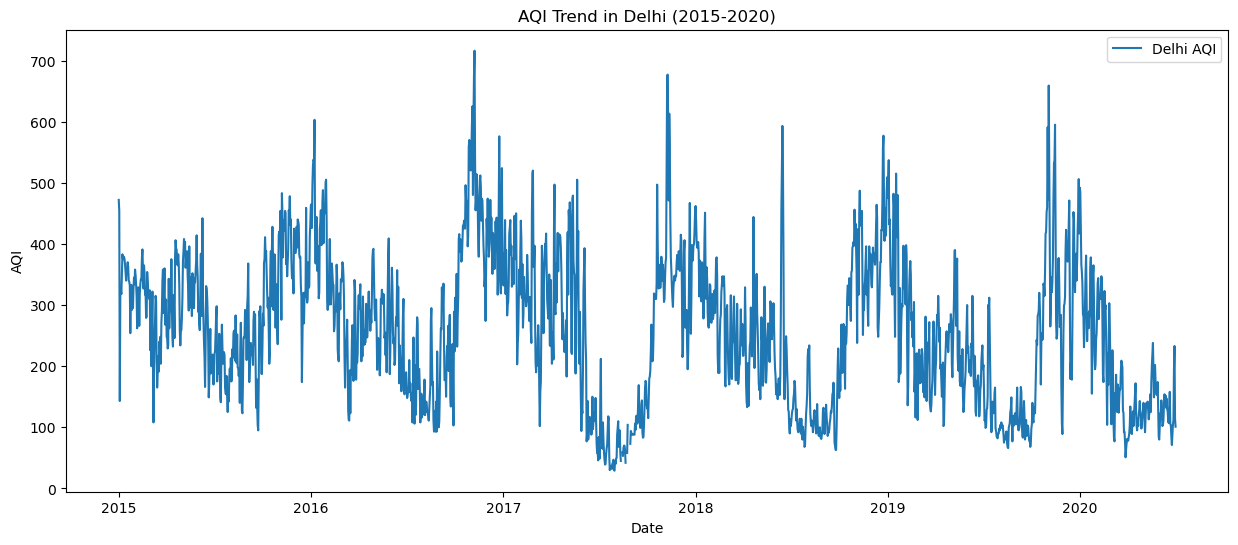

In [9]:
# Import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size to make the graph bigger and easier to read
plt.figure(figsize=(15, 6))

# Select only the data for Delhi from your city_df
delhi_df = city_df[city_df['City'] == 'Delhi']

# Plot the Date vs. the AQI for Delhi
plt.plot(delhi_df['Date'], delhi_df['AQI'], label='Delhi AQI')

# Add a title and labels
plt.title('AQI Trend in Delhi (2015-2020)')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()

# Show the plot
plt.show()

### Step 6: Compare Average AQI Across Cities
To compare the overall air quality between major metropolitan areas, we calculate the **average AQI for each city**.  
We then visualize the results using a bar chart, which highlights which cities experienced the highest pollution levels on average.

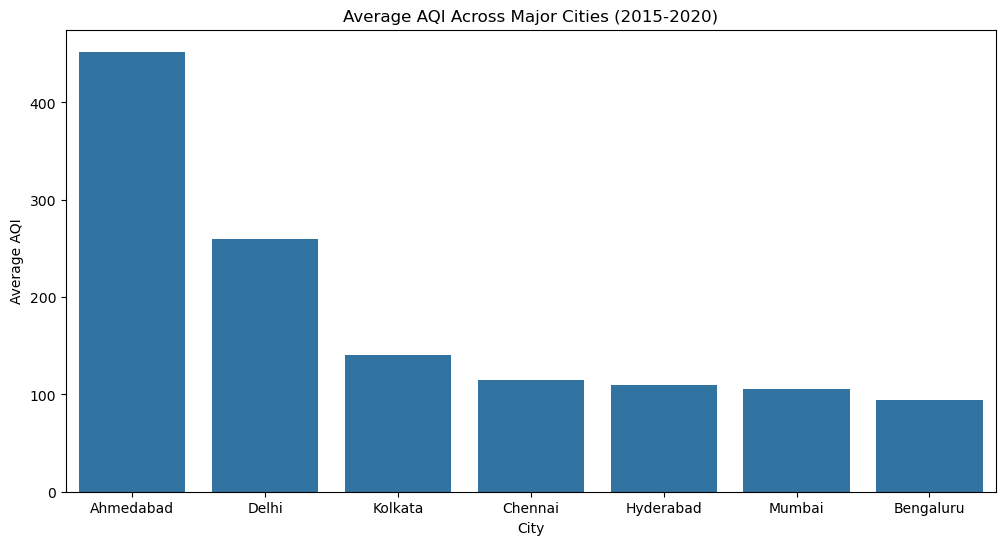

In [11]:
# This calculates the average AQI for each city
avg_aqi = city_df.groupby('City')['AQI'].mean().sort_values(ascending=False)

# This creates the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_aqi.index, y=avg_aqi.values)
plt.title('Average AQI Across Major Cities (2015-2020)')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()

### Step 7: Handle Missing Values
The dataset may contain missing AQI readings for some dates.  
To ensure smooth analysis, we handle missing values using **forward fill (`ffill`)** and **backward fill (`bfill`)** methods.  
This way, any missing data is replaced with the nearest valid observation.  

In [6]:
# The new, modern way to fill missing values
city_df = city_df.ffill()
city_df = city_df.bfill()

# Check that it worked (the output should be all zeros)
print(city_df.isnull().sum())

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


### Step 8: Check for Duplicates
It is important to verify if there are duplicate rows in the dataset and remove them if found.

In [5]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicates if any
df = df.drop_duplicates()
print("Duplicates removed (if any). New shape:", df.shape)


Number of duplicate rows: 0
Duplicates removed (if any). New shape: (29531, 16)


### Step 9: Outlier Detection (Basic)
We perform a simple check for outliers in numerical columns using boxplots.

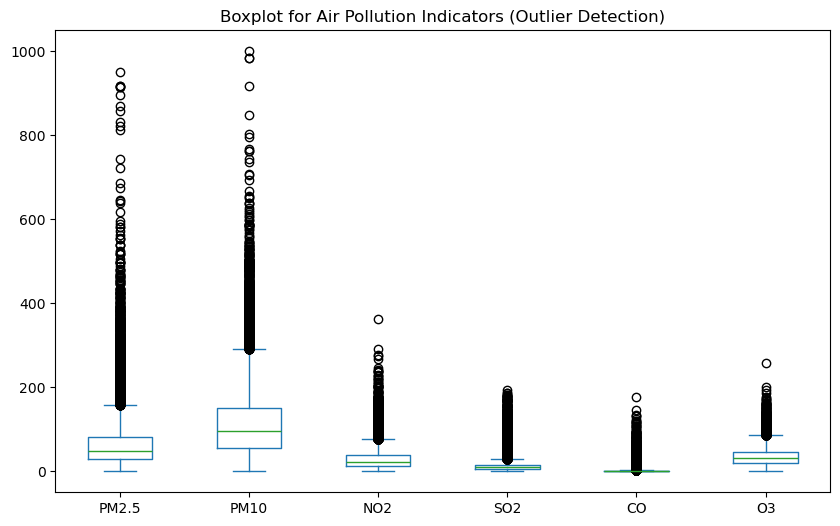

In [6]:
import matplotlib.pyplot as plt

# Boxplot for key numerical columns
df[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']].plot(kind='box', figsize=(10,6))
plt.title("Boxplot for Air Pollution Indicators (Outlier Detection)")
plt.show()


### Step 10: Save the Preprocessed Data
After cleaning and preprocessing, we save the dataset for further analysis.

In [ ]:
# Save the cleaned dataset to a new CSV file
df.to_csv("Cleaned_Air_Pollution_Data.csv", index=False)
print("Preprocessed dataset saved as 'Cleaned_Air_Pollution_Data.csv'")

Preprocessed dataset saved as 'Cleaned_Air_Pollution_Data.csv'
